# Homework #2

In [1]:
from sklearn.mixture import GaussianMixture
from tqdm import tqdm

## Problem 1 

Was solved using Matlab. And in attachments. 

## Problem 2

Write a Python program to fit a GMM to the data generated in part 1.1 with varying number of
components K = {1, 2, 3, 4, 5, 6, 7}. For each estimated model compute the log-likelihood function
given the generated data (see lecture slides) and plot it with respect to K. Note: to perform the fitting,
you can use the class mixture.GMM from the sklearn package and the score method to compute the
log-likelhood.

In [2]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Necessary Variables
K = 4                             # Number of Random Samples
total_samples = 10**3             # Total Samples
num_samples = total_samples // K  # Number Of Individual Samples 

### Create First Sample

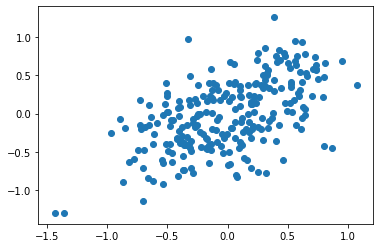

In [4]:
## Create First Sample
sample1_x = []
sample1_y = []
mean1 = [0,0]
cov1 = [[0.2, 0.1], [0.1, 0.2]]

for i in range(num_samples):
    x,y = np.random.multivariate_normal(mean1,cov1)
    sample1_x.append(x)
    sample1_y.append(y)
    
plt.scatter(sample1_x, sample1_y)
plt.show()


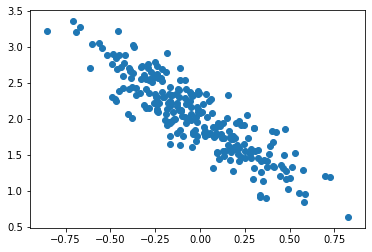

In [5]:
## Create Second Sample
sample2_x = []
sample2_y = []
mean2 = [0,2]
cov2 = [[0.1, -0.15], [-0.15, 0.3]]

for i in range(num_samples):
    x,y = np.random.multivariate_normal(mean2,cov2)
    sample2_x.append(x)
    sample2_y.append(y)
    
plt.scatter(sample2_x, sample2_y)
plt.show()

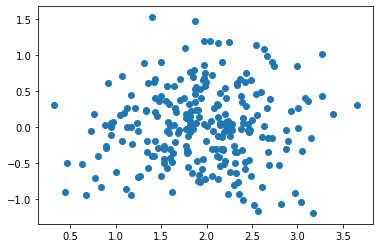

In [6]:
## Create Third Sample
sample3_x = []
sample3_y = []
mean3 = [2,0]
cov3 = [[0.3, 0.05], [0.05, 0.3]]

for i in range(num_samples):
    x,y = np.random.multivariate_normal(mean3,cov3)
    sample3_x.append(x)
    sample3_y.append(y)
    
plt.scatter(sample3_x, sample3_y)
plt.show()

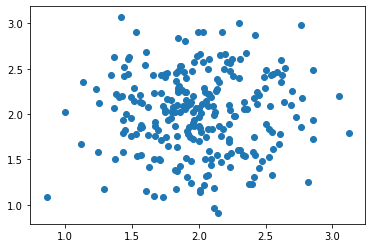

In [7]:
## Create Fourth Sample
sample4_x = []
sample4_y = []
mean4 = [2,2]
cov4 = [[0.15, 0], [0, 0.15]]

for i in range(num_samples):
    x,y = np.random.multivariate_normal(mean4,cov4)
    sample4_x.append(x)
    sample4_y.append(y)
    
plt.scatter(sample4_x, sample4_y)
plt.show()

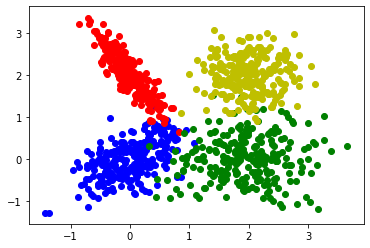

In [8]:
### Plot All Distributions

plt.figure()
plt.scatter(sample1_x, sample1_y, color='b')
plt.scatter(sample2_x, sample2_y, color='r')
plt.scatter(sample3_x, sample3_y, color='g')
plt.scatter(sample4_x, sample4_y, color='y')
plt.show()

### Proceed to Fit The Mixture Model 

In [9]:
# Initialize Gaussian Mixture Object
GMM = GaussianMixture(n_components=4)
# Declare Weights
GMM.weights_ = np.asarray([1/8, 1/8, 1/4, 1/2])
# Declare Means
GMM.means_ = np.asarray([[0,0], [0,2], [2,0], [2,2]])
# Declare Covariances
cv1 = np.array([0.2, 0.1, 0.1, 0.2]).reshape((2,2))
cv2 = np.array([0.1, -0.15, -0.15, 0.3]).reshape((2,2))
cv3 = np.array([0.3, 0.05, 0.05, 0.3]).reshape((2,2))
cv4 = np.array([0.15, 0, 0, 0.15]).reshape((2,2))
cv = np.array([cv1,cv2,cv3,cv4])
GMM.covariances_ = cv
GMM

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

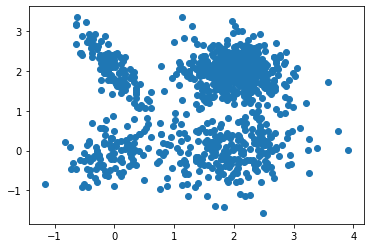

In [10]:
# Set Variables
variables,_ = GMM.sample(total_samples)
x = variables[:,0]
y = variables[:,1]
plt.scatter(x,y)
plt.show()

We can see that the graph matches the one I created individually and then combined. 
This shows that the Gaussian Model I have created is correct. The next part is proceeded to compute the log-likelihood function.

### Calculate the log-likelihood function

#### K = 1

In [11]:
GMM_1 = GaussianMixture(n_components=4)
GMM_1.fit(variables)
variables_1 = GMM_1.score(variables)

In [12]:
K_list = [1,2,3,4,5,6,7]
LogLikelihood_List = []
for i in K_list:
    GMM_i = GaussianMixture(n_components=i)
    GMM_i.fit(variables)
    log_likelihood = GMM_i.score(variables)
    LogLikelihood_List.append(log_likelihood)


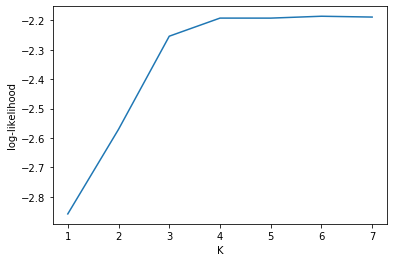

In [13]:
plt.plot(K_list, LogLikelihood_List)
plt.xlabel("K")
plt.ylabel("log-likelihood")
plt.show()

We can see that as we increase the n_components our model does better. But more importantly after reaching 5 components. Our model stabilizes. This shows that there are only so many ways we can breakup the model. Especially since there were only four initial groups. 

## Problem 3

### 10 Sensors

In [158]:
# Initialize Gaussian Mixture Object 1
GMM = GaussianMixture(n_components=11)
GMM.weights_ = np.asarray([1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11, 1/11])
# Declare Variables and Convariance
x_mean = [0.5, 0.5]
x_cv = 0.1*np.identity(2)
y_mean = [1.5, 1.5]
y_cv = np.array([0.2, 0.1, 0.1, 0.1]).reshape((2,2))
GMM.means_ = np.asarray([x_mean, y_mean, y_mean, y_mean, y_mean, y_mean, y_mean, y_mean, y_mean,y_mean, y_mean])
# Calculate Inverse of Matrices
x_inverse = np.linalg.inv(x_cv)
y_inverse = np.linalg.inv(y_cv)
GMM.precisions_cholesky_ = np.asarray([x_inverse, y_inverse, y_inverse, y_inverse, y_inverse, y_inverse, y_inverse, y_inverse, y_inverse, y_inverse, y_inverse])

cv = np.array([x_cv, y_cv, y_cv, y_cv, y_cv, y_cv, y_cv, y_cv, y_cv, y_cv, y_cv])
GMM.covariances_ = cv
GMM

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=11, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

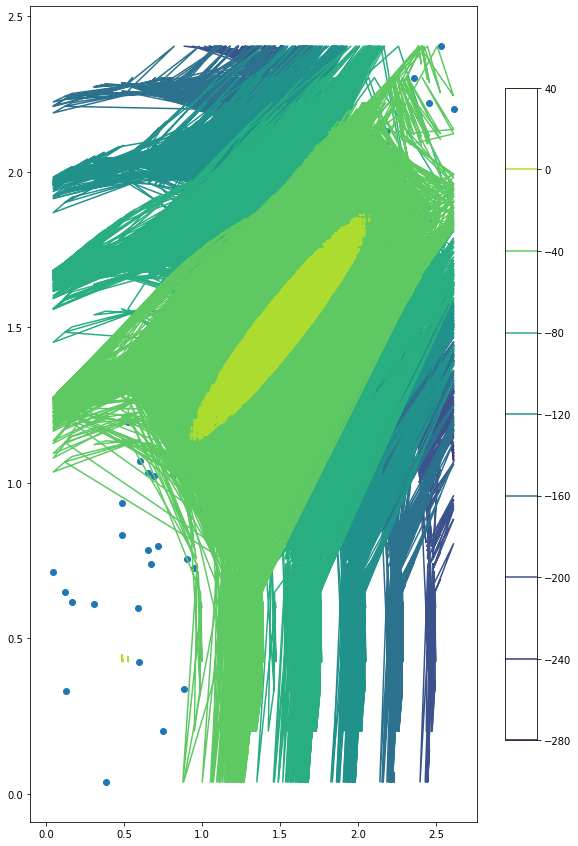

In [159]:
variables,labels = GMM.sample(200)
x = variables[:,0]
y = variables[:,1]
X,Y = np.meshgrid(x,y)
XX = np.array([X.ravel(), Y.ravel()]).T
z = GMM.score_samples(XX)
z = z.reshape(X.shape)


plt.figure(figsize=(10,15))
CS = plt.contour(x, y,z)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(x,y)
plt.show()

I decided to fit a model seperately since I think I am doing something wrong. 
It seems that for the most part the model is creating a clear outline near the mean where the object is probably at. 

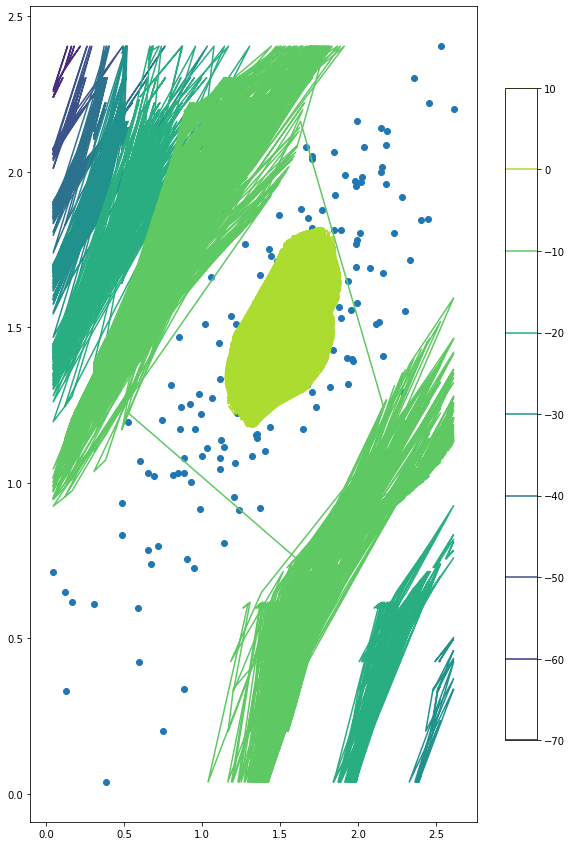

In [160]:
GMM_1 = GaussianMixture(n_components=11)
GMM_1.fit(variables)
variables_1 = GMM_1.score(variables)

x = variables[:,0]
y = variables[:,1]
X,Y = np.meshgrid(x,y)
XX = np.array([X.ravel(), Y.ravel()]).T
z = GMM_1.score_samples(XX)
z = z.reshape(X.shape)


plt.figure(figsize=(10,15))
CS = plt.contour(x, y,z)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(x,y)
plt.show()


### 100 Sensors

In [161]:
N = 101
# Declare Weights
weights = np.zeros(N)
for i in range(N):
    weights[i] = 1/N

# Declare Means
x_mean = [0.5, 0.5]
x_cv = 0.1*np.identity(2)
y_mean = [1.5, 1.5]
y_cv = np.array([0.2, 0.1, 0.1, 0.1]).reshape((2,2))
means = []
for i in range(N):
    if i == 0:
        means.append(x_mean)
        continue
    means.append(y_mean)
means = np.asarray(means)

# Declare Covariances
covariances = []
for i in range(N):
    if i == 0:
        covariances.append(x_cv)
    else:
        covariances.append(y_cv)
covariances = np.asarray(covariances)

# Initialize Gaussian Mixture Object 1
GMM = GaussianMixture(n_components=N)
GMM.weights_ = weights
GMM.means_ = means
GMM.covariances_ = covariances
GMM


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=101, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

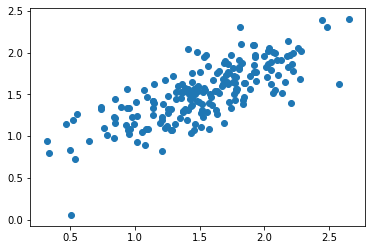

In [162]:
variables,labels = GMM.sample(200)
x = variables[:,0]
y = variables[:,1]

plt.scatter(x,y)
plt.show()


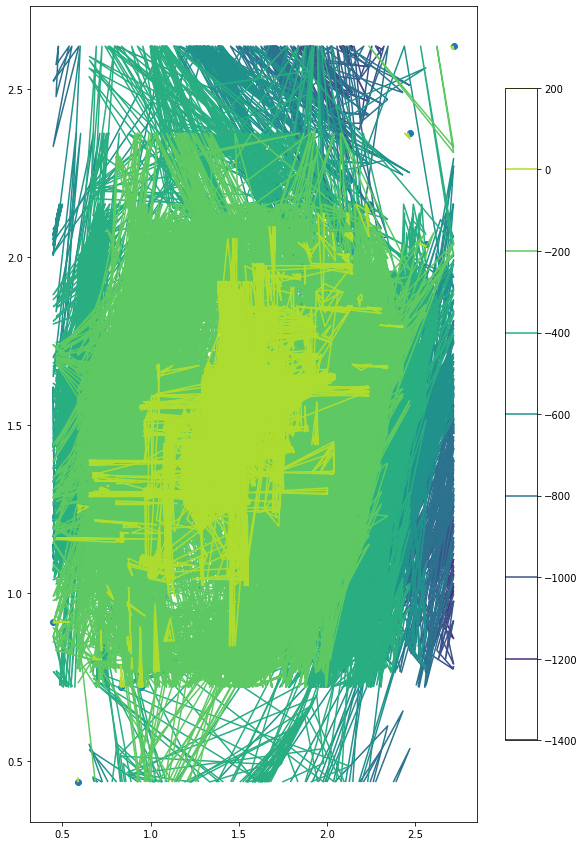

In [157]:
GMM_1 = GaussianMixture(n_components=N)
GMM_1.fit(variables)
variables_1 = GMM_1.score(variables)

x = variables[:,0]
y = variables[:,1]
X,Y = np.meshgrid(x,y)
XX = np.array([X.ravel(), Y.ravel()]).T
z = GMM_1.score_samples(XX)
z = z.reshape(X.shape)


plt.figure(figsize=(10,15))
CS = plt.contour(x, y,z)
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(x,y)
plt.show()

### Updated Method

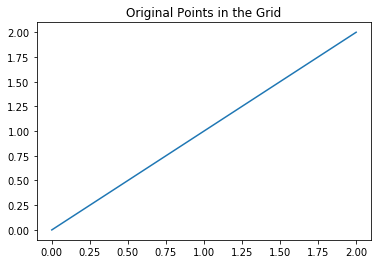

In [250]:
# Declare Initial Arrays
x = np.linspace(0,2,1000)
y = np.linspace(0,2,1000)

# Declare MeshGrid
XX, YY = np.meshgrid(x,y)

plt.title("Original Points in the Grid")
plt.plot(x,y)

In [261]:
import scipy.stats as stats

x_mean = [0.5, 0.5]
x_cv = 0.1*np.identity(2)
y_mean = [1.5, 1.5]
y_cv = np.array([0.2, 0.1, 0.1, 0.1]).reshape((2,2))

def line(x,b,m):
    return b + m * x

def label(theta):
    return "[%2.2f, %2.2f]" %(theta[0],theta[1]);

def linearmodel(x,w):
    phi = lineRegressor(x);
    return phi.dot(w);


def likelihood(model,x,w):
    mu = model(x,w);
    ps = np.random.multivariate_normal(x_mean, x_cv)
    l = 1;
    for p in ps:
        l = l*p;
    return l;

def lineRegressor(x):
    x = np.array(x,ndmin=2); #make sure scalars are treated as matrices
    ones = np.ones((np.shape(x)[0],1));
    phi = np.concatenate((ones,x), axis=1);
    return phi;



In [295]:
Phi = lineRegressor(x);
print(Phi.shape)
SN_inv = np.linalg.inv(y_cv) + beta*Phi.T.dot(Phi)

(1, 1001)


#### 10 Sensors

In [185]:
print(XX.shape)


(1000, 1000)


### Conclusion

We can see that the highest probability is still in between the 1.0 and the 2.0 x range. 
This means that its very similar to the result we got when we only used 10 Sensors. This means that adding more components gives no clear positive benefit. 

The Guassian  Mixture Model in a sense is combining everything. So it means that after 10 Sensors we probably reached convergence. Any more sensors is similar to overfitting. We are not allowing variance to come into the equation. In fact we are most likely destroying the probabilistic 

## Problem 4

In [14]:
def target(x):
    t = np.sin(2*np.pi*x) + np.cos(4*np.pi*x)
    return t

In [15]:
# First Training Dataset
first_sample = np.arange(0,1,0.2)
assert(len(first_sample) == 5)
first_targets = np.zeros(first_sample.shape)
assert(len(first_targets) == 5)
## Calculate Targets
for i in range(len(first_targets)):
    first_targets[i] = target(first_sample[i])


second_sample = np.arange(0,1,0.01)
assert(len(second_sample) == 100)
second_targets = np.zeros(second_sample.shape)
assert(len(second_sample) == 100)
## Calculate Targets
for i in range(len(second_sample)):
    second_targets[i] = target(second_sample[i])

### Sample Size (5)

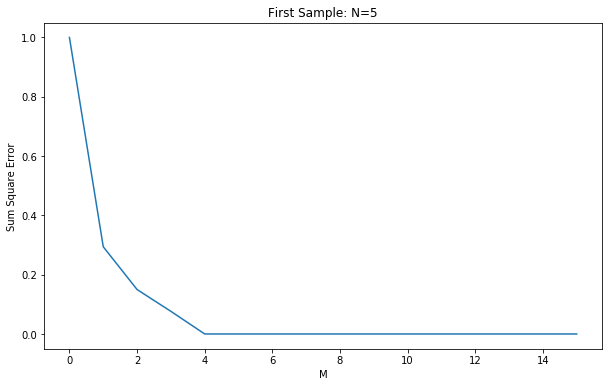

In [16]:
# MSE From SciKit Learn
from sklearn.metrics import mean_squared_error 
import warnings
warnings.simplefilter('ignore', np.RankWarning)

# Plot Sum of Squares of Error
M = np.arange(0,16,1)
first_sample_error_List = np.zeros(M.shape)
assert(len(M) == len(first_sample_error_List))

#Calculate MSE For First Sample
for i in range(len(M)):
    z = np.polyfit(first_sample, first_targets, M[i])
    p = np.poly1d(z)
    y_hat = p(first_sample)
    first_sample_error_List[i] = mean_squared_error(first_targets, y_hat)


plt.figure(figsize=(10,6))
plt.title("First Sample: N=5")
plt.plot(M, first_sample_error_List)
plt.ylabel("Sum Square Error")
plt.xlabel("M")
plt.show()


### Sample of Polyfit (5)

We reach convergence at a Polynomial fit of 5. Anything further is just a massive overfit of the sample. 

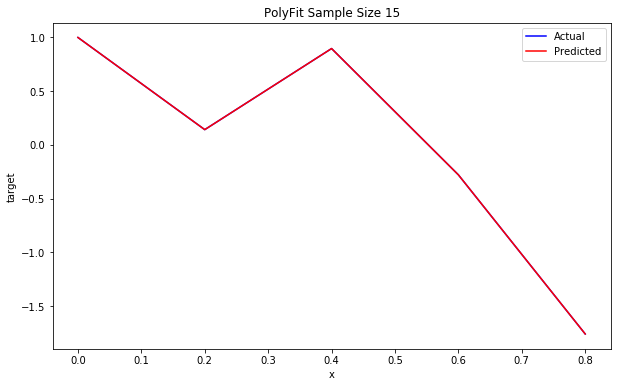

In [17]:
z = np.polyfit(first_sample, first_targets, 5)
p = np.poly1d(z)
y_hat = p(first_sample)

plt.figure(figsize=(10,6))
plt.title("PolyFit Sample Size 15")
plt.plot(first_sample, first_targets, "blue", label="Actual")
plt.plot(first_sample, y_hat, "red", label="Predicted")
plt.xlabel("x")
plt.ylabel("target")
plt.legend()
plt.show()

### Sample Size (100)

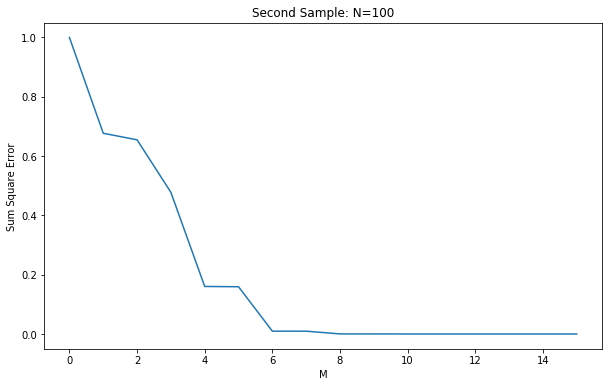

In [18]:
# MSE From SciKit Learn
from sklearn.metrics import mean_squared_error 
import warnings
warnings.simplefilter('ignore', np.RankWarning)

# Plot Sum of Squares of Error
M = np.arange(0,16,1)
second_sample_error_List = np.zeros(M.shape)
assert(len(M) == len(second_sample_error_List))

#Calculate MSE For First Sample
for i in range(len(M)):
    z = np.polyfit(second_sample, second_targets, M[i])
    p = np.poly1d(z)
    y_hat = p(second_sample)
    second_sample_error_List[i] = mean_squared_error(second_targets, y_hat)
    
plt.figure(figsize=(10,6))
plt.title("Second Sample: N=100")
plt.plot(M, second_sample_error_List)
plt.ylabel("Sum Square Error")
plt.xlabel("M")
plt.show()

### Sample of Polyfit (100)

Since we are using 100 points its clears that we need a few more degrees to match the data. Of course it is important to remember that we were able to fit the data with just 4 degrees when we used a smaller sample size. So This is interesting. 

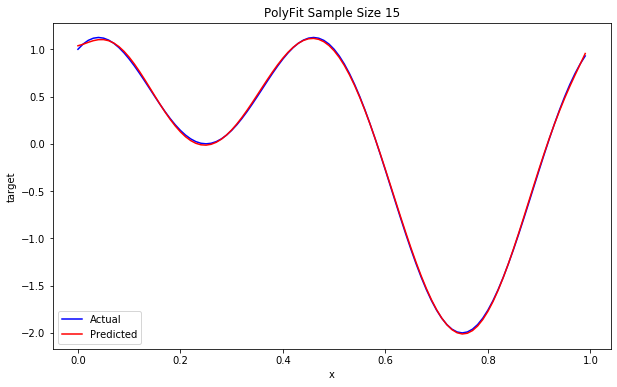

In [19]:
z = np.polyfit(second_sample, second_targets, 8)
p = np.poly1d(z)
y_hat = p(second_sample)

plt.figure(figsize=(10,6))
plt.title("PolyFit Sample Size 15")
plt.plot(second_sample, second_targets, "blue", label="Actual")
plt.plot(second_sample, y_hat, "red", label="Predicted")
plt.xlabel("x")
plt.ylabel("target")
plt.legend()
plt.show()

### Proceed to Train/Test on the Dataset

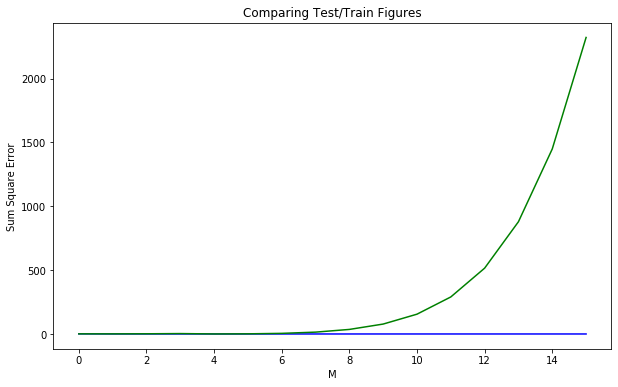

In [20]:
# MSE From SciKit Learn
from sklearn.metrics import mean_squared_error 
import warnings
warnings.simplefilter('ignore', np.RankWarning)

# Plot Sum of Squares of Error
M = np.arange(0,16,1)
train_error_List = np.zeros(M.shape)
test_error_List = np.zeros(M.shape)
assert(len(M) == len(test_error_List))

#Calculate MSE For First Sample
for i in range(len(M)):
    z = np.polyfit(first_sample, first_targets, M[i])
    p = np.poly1d(z)
    # Test The Values
    y_hat_train = p(first_sample)
    y_hat_test  = p(second_sample)
    train_error_List[i] = mean_squared_error(first_targets, y_hat_train)
    test_error_List[i] = mean_squared_error(second_targets, y_hat_test)
    
plt.figure(figsize=(10,6))
plt.title("Comparing Test/Train Figures")
plt.plot(M, train_error_List, "blue", label="Training Set")
plt.plot(M, test_error_List, "green", label="Test Set")
plt.ylabel("Sum Square Error")
plt.xlabel("M")
plt.show()

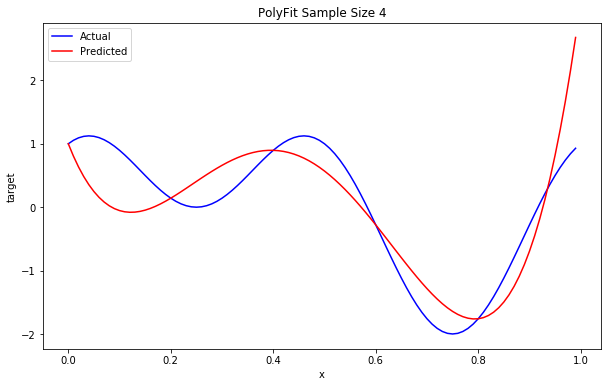

In [21]:
z = np.polyfit(first_sample, first_targets, 4)
p = np.poly1d(z)
y_hat_train = p(first_sample)
y_hat_test = p(second_sample)

plt.figure(figsize=(10,6))
plt.title("PolyFit Sample Size 4")
plt.plot(second_sample, second_targets, "blue", label="Actual")
plt.plot(second_sample, y_hat_test, "red", label="Predicted")
plt.xlabel("x")
plt.ylabel("target")
plt.legend()
plt.show()

### With L2 Regulirazation

#### Polynomial Fitting with LSTSQ

/home/franciscoAML/anaconda3/envs/AI/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


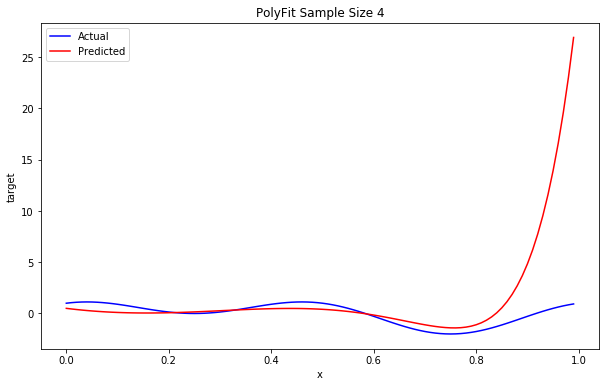

In [22]:
from sklearn.preprocessing import normalize
import math

N = 14
lambda_value = 0.001
W = np.polynomial.polynomial.polyvander(first_sample, N)
l2 = normalize(W, 'l2')

z = np.linalg.lstsq(W + math.exp(lambda_value) * l2,first_targets)[0] 
p = np.poly1d(np.flip(z))

y_hat_train = p(first_sample)
y_hat_test = p(second_sample)

plt.figure(figsize=(10,6))
plt.title("PolyFit Sample Size 4")
plt.plot(second_sample, second_targets, "blue", label="Actual")
plt.plot(second_sample, y_hat_test, "red", label="Predicted")
plt.xlabel("x")
plt.ylabel("target")
plt.legend()
plt.show()


100%|██████████| 620/620 [00:00<00:00, 1379.80it/s]


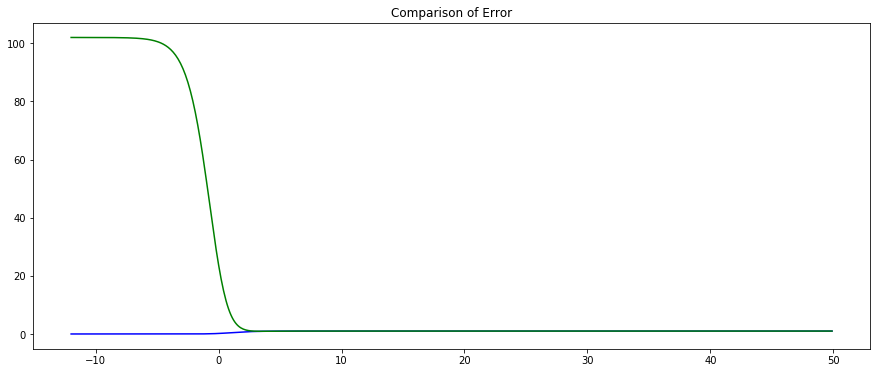

In [23]:
np.warnings.filterwarnings('ignore')
# Trying Differnt Lambda Values
lambda_value_list = np.arange(10^-2,50,0.1)

train_error = np.zeros(lambda_value_list.shape)
test_error = np.zeros(lambda_value_list.shape)

# Initialize Values
N = 14

for i in tqdm(range(len(lambda_value_list))):
    if lambda_value_list[i] == 0:
        continue
    W = np.polynomial.polynomial.polyvander(first_sample, N)
    l2 = normalize(W, 'l2')
    z = np.linalg.lstsq(W + math.exp(lambda_value_list[i]) * l2,first_targets)[0] 
    p = np.poly1d(np.flip(z))

    y_hat_train = p(first_sample)
    y_hat_test  = p(second_sample)
    
    train_mse = mean_squared_error(y_hat_train, first_targets)
    test_mse  = mean_squared_error(y_hat_test, second_targets)
    
    train_error[i] = train_mse
    test_error[i] = test_mse

plt.figure(figsize=(15,6))
plt.plot(lambda_value_list, train_error, 'blue')
plt.plot(lambda_value_list, test_error, 'green')
plt.title("Comparison of Error")
plt.show()

#### Polynomial Fitting With Gradient Descent

(15,)


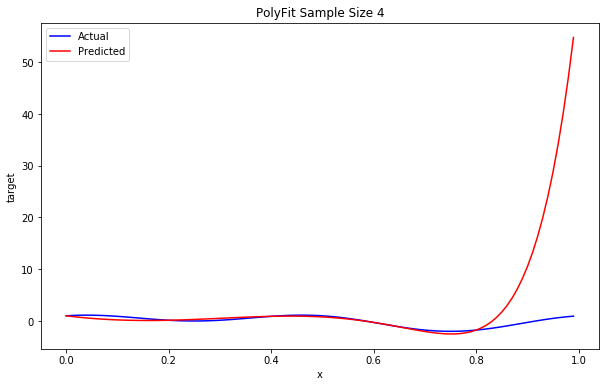

In [24]:
from sklearn.preprocessing import normalize

def linreg(w,X):
    p = np.poly1d(np.flip(w.flatten()))
    return p(X)


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

        
lr = 0.003
num_epochs = 100
lambda_value = 0.001


W = np.polynomial.polynomial.polyvander(first_sample, 14)
z = np.linalg.lstsq(W,first_targets)[0] 
p = np.poly1d(np.flip(z))
gradient = np.ones(z.shape)
print(z.shape)

loss_history = np.zeros((num_epochs,1))

for epoch in range(num_epochs):
    l2 = 1/2 * normalize(z.reshape(1,-1), 'l2')
    x = np.repeat(first_sample.T,15)
    x = x.reshape(5,15)
    loss = 0
    for i in range(len(x)):
        loss += first_sample[i] * squared_loss(linreg(z,first_sample[i]), first_targets[i]) + lambda_value*l2
    z = z - lr * loss
        
z = z.flatten()
p = np.poly1d(np.flip(z))

y_hat_train = p(first_sample)
y_hat_test = p(second_sample)

plt.figure(figsize=(10,6))
plt.title("PolyFit Sample Size 4")
plt.plot(second_sample, second_targets, "blue", label="Actual")
plt.plot(second_sample, y_hat_test, "red", label="Predicted")
plt.xlabel("x")
plt.ylabel("target")
plt.legend()
plt.show()

In [25]:
from sklearn.preprocessing import normalize

def linreg(w,X):
    p = np.poly1d(np.flip(w.flatten()))
    return p(X)


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def RidgeRegression(lambda_value, lr=0.001, num_epochs=200):
    W = np.polynomial.polynomial.polyvander(first_sample, 14)
    z = np.linalg.lstsq(W,first_targets)[0] 
    p = np.poly1d(np.flip(z))

    loss_history = np.zeros((num_epochs,1))

    for epoch in range(num_epochs):
        loss = 0
        l2 = 1/2 * normalize(z.reshape(1,-1), 'l2')
        x = np.repeat(first_sample.T,15)
        x = x.reshape(5,15)

        for i in range(len(x)):
            loss += first_sample[i] * squared_loss(linreg(z,first_sample[i]), first_targets[i]) + lambda_value*l2
        z = z - lr * loss

    z = z.flatten()
    p = np.poly1d(np.flip(z))
    return p

100%|██████████| 620/620 [00:37<00:00, 16.58it/s]


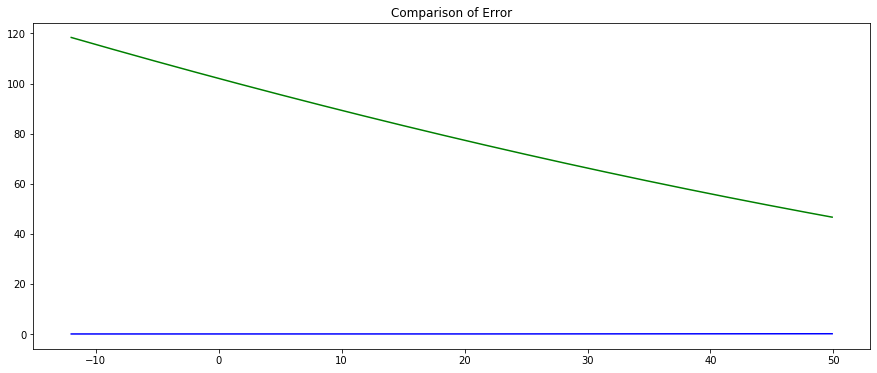

In [26]:
# Trying Differnt Lambda Values
lambda_value_list = np.arange(10^-2,50,0.1)

train_error = np.zeros(lambda_value_list.shape)
test_error = np.zeros(lambda_value_list.shape)

for i in tqdm(range(len(lambda_value_list))):
    if lambda_value_list[i] == 0:
        continue
   
    p = RidgeRegression(lambda_value_list[i])
    
    y_hat_train = p(first_sample)
    y_hat_test  = p(second_sample)
    
    train_mse = mean_squared_error(y_hat_train, first_targets)
    test_mse  = mean_squared_error(y_hat_test, second_targets)
    
    train_error[i] = train_mse
    test_error[i] = test_mse

plt.figure(figsize=(15,6))
plt.plot(lambda_value_list, train_error, 'blue')
plt.plot(lambda_value_list, test_error, 'green')
plt.title("Comparison of Error")
plt.show()

#### With SK-Learn

In [27]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

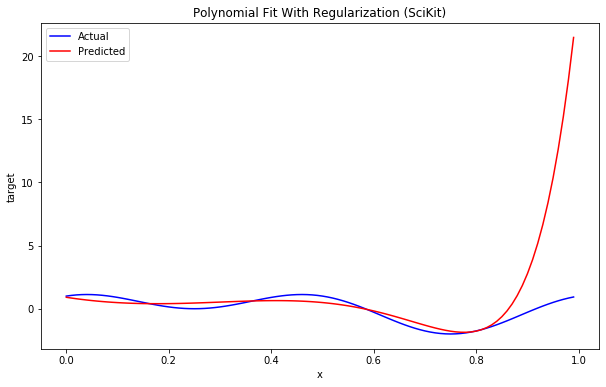

In [28]:
model = make_pipeline(PolynomialFeatures(14), Ridge(alpha=0.0001))
model.fit(first_sample.reshape(-1,1), first_targets)
y_hat_test = model.predict(second_sample.reshape(-1,1))

plt.figure(figsize=(10,6))
plt.title("Polynomial Fit With Regularization (SciKit)")
plt.plot(second_sample, second_targets, "blue", label="Actual")
plt.plot(second_sample, y_hat_test, "red", label="Predicted")
plt.xlabel("x")
plt.ylabel("target")
plt.legend()
plt.show()

100%|██████████| 620/620 [00:00<00:00, 647.21it/s]


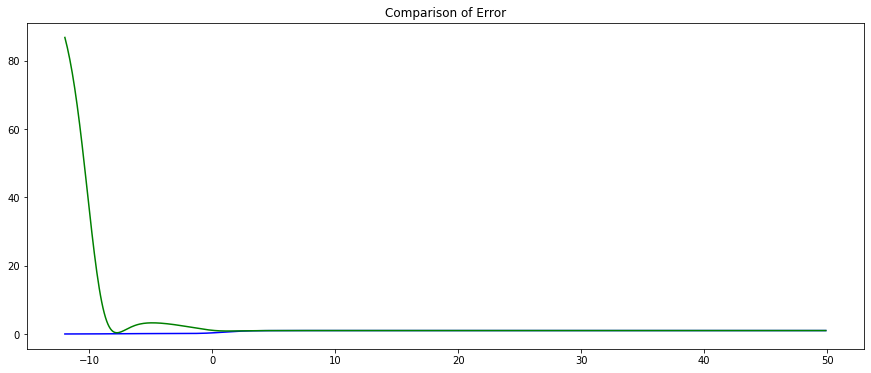

In [29]:
# Trying Differnt Lambda Values
lambda_value_list = np.arange(10^-2,50,0.1)

train_error = np.zeros(lambda_value_list.shape)
test_error = np.zeros(lambda_value_list.shape)

for i in tqdm(range(len(lambda_value_list))):

    model = make_pipeline(PolynomialFeatures(14), Ridge(alpha=math.exp(lambda_value_list[i])))
    model.fit(first_sample.reshape(-1,1), first_targets)
    
    y_hat_train = model.predict(first_sample.reshape(-1,1))
    y_hat_test  = model.predict(second_sample.reshape(-1,1))
    
    train_mse = mean_squared_error(y_hat_train, first_targets)
    test_mse  = mean_squared_error(y_hat_test, second_targets)
    
    train_error[i] = train_mse
    test_error[i] = test_mse

plt.figure(figsize=(15,6))
plt.plot(lambda_value_list, train_error, 'blue')
plt.plot(lambda_value_list, test_error, 'green')
plt.title("Comparison of Error")
plt.show()

100%|██████████| 10000/10000 [00:15<00:00, 649.58it/s]


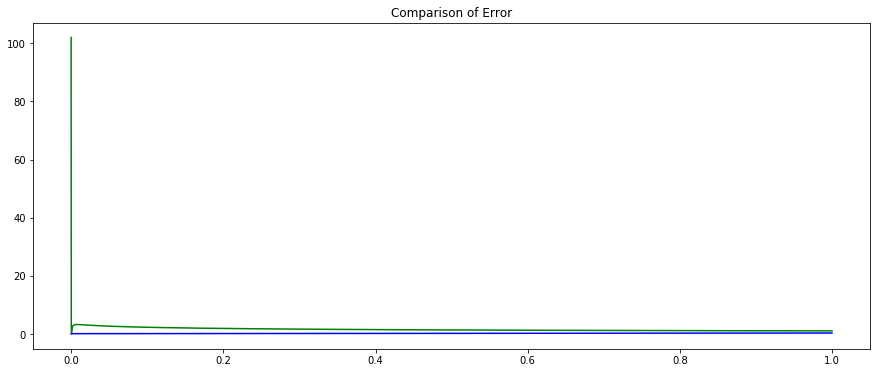

In [30]:
# Trying Differnt Lambda Values
lambda_value_list = np.arange(0,1,0.0001)

train_error = np.zeros(lambda_value_list.shape)
test_error = np.zeros(lambda_value_list.shape)

for i in tqdm(range(len(lambda_value_list))):
    model = make_pipeline(PolynomialFeatures(14), Ridge(alpha=lambda_value_list[i]))
    model.fit(first_sample.reshape(-1,1), first_targets)
    
    y_hat_train = model.predict(first_sample.reshape(-1,1))
    y_hat_test  = model.predict(second_sample.reshape(-1,1))
    
    train_mse = mean_squared_error(y_hat_train, first_targets)
    test_mse  = mean_squared_error(y_hat_test, second_targets)
    
    train_error[i] = train_mse
    test_error[i] = test_mse

plt.figure(figsize=(15,6))
plt.plot(lambda_value_list, train_error, 'blue')
plt.plot(lambda_value_list, test_error, 'green')
plt.title("Comparison of Error")
plt.show()

## Problem 6

### Declare GMM 

In [192]:
# Initialize Gaussian Mixture Object 1
GMM1 = GaussianMixture(n_components=1)
# Weights
GMM1.weights_ = np.asarray([1])
# Declare Means
GMM1.means_ = np.asarray([[0,0]])
# Declare Covariances
cv1 = 0.1 * np.identity(2)
cv = np.array([cv1])
GMM1.covariances_ = cv
GMM1

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [193]:
# Initialize Gaussian Mixture Object 2
GMM2 = GaussianMixture(n_components=2)
# Declare Weights
GMM2.weights_ = np.asarray([1/2, 1/2])
# Declare Means
GMM2.means_ = np.asarray([[-1,-1], [1,1]])
# Declare Covariances
cv1 = 0.1 * np.identity(2)
cv = np.array([cv1,cv1])
GMM2.covariances_ = cv
GMM2

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

### Generate Samples

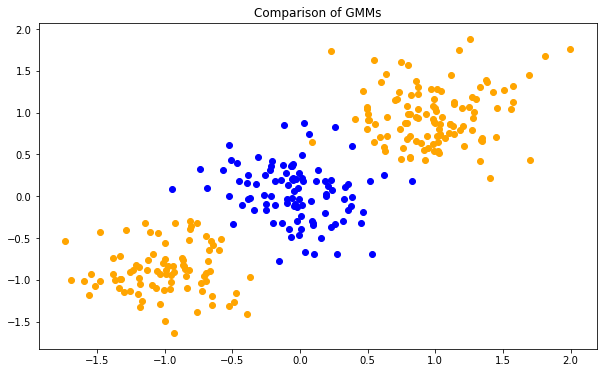

In [194]:
# Samples From GMM1
variables,_ = GMM1.sample(100)
x1 = variables[:,0]
y1 = variables[:,1]

# Samples From GMM2
variables2,_ = GMM2.sample(200)
x2 = variables2[:,0]
y2 = variables2[:,1]

# Plot First Variables
x1 = variables[:,0]
y1 = variables[:,1]

# Plot Second Variables
x2 = variables2[:,0]
y2 = variables2[:,1]

# Plot Scatter
plt.figure(figsize=(10,6))
plt.title("Comparison of GMMs")
plt.scatter(x1, y1, color='blue')
plt.scatter(x2, y2, color="orange")

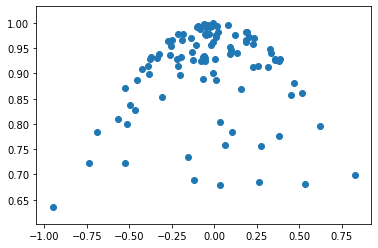

In [214]:
# Declare Phi 1

u1 = np.asarray([0,0])
y1_hat = np.zeros(y1.shape)
for i in range(len(x1)):
    y1_hat[i] = np.exp(-1/2 * np.matmul(np.asarray(([x1[i],y1[i]]) - u1).T , np.asarray([x1[i],y1[i]]) - u1 ))
    
plt.scatter(x1, y1_hat)

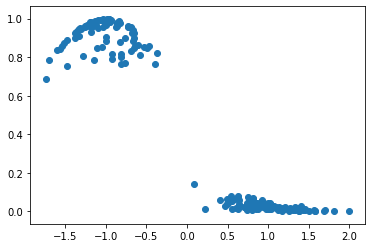

In [215]:
# Declare Phi 1

u2 = np.asarray([-1,-1])
y2_hat = np.zeros(y2.shape)
for i in range(len(x2)):
    y2_hat[i] = np.exp(-1/2 * np.matmul(np.asarray(([x2[i],y2[i]]) - u2).T , np.asarray([x2[i],y2[i]]) - u2 ))
    
plt.scatter(x2, y2_hat)

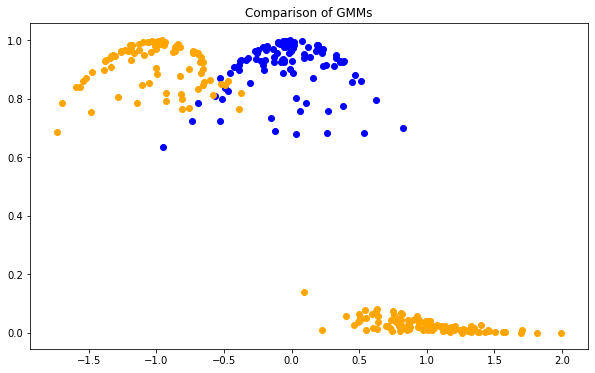

In [216]:
# Combined the Plots

plt.figure(figsize=(10,6))
plt.title("Comparison of GMMs")
plt.scatter(x1, y1_hat, color='blue')
plt.scatter(x2, y2_hat, color="orange")

In [220]:
# Phi 1 Function
def phi1(x,y, u1=np.asarray([0,0])):
    y1_hat = np.exp(-1/2 * np.matmul(np.asarray(([x,y]) - u1).T , np.asarray([x,y]) - u1 ))
    return y1_hat

def phi2(x,y, u1=np.asarray([-1,-1])):
    y1_hat = np.exp(-1/2 * np.matmul(np.asarray(([x,y]) - u1).T , np.asarray([x,y]) - u1 ))
    return y1_hat

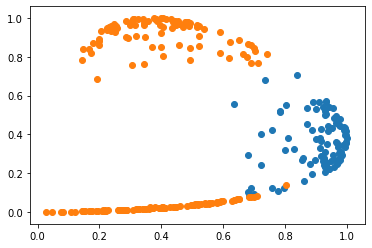

In [225]:
# Transformed Data Phi-1
x1_hat = np.zeros(y1.shape)
y1_hat = np.zeros(y1.shape)
for i in range(len(x1)):
    x1_hat[i] = phi1(x1[i], y1[i])
    y1_hat[i] = phi2(x1[i], y1[i])

# Transofmred Data Phi-2
x2_hat = np.zeros(y2.shape)
y2_hat = np.zeros(y2.shape)
for i in range(len(x2)):
    x2_hat[i] = phi1(x2[i], y2[i])
    y2_hat[i] = phi2(x2[i], y2[i])


plt.scatter(x1_hat, y1_hat)
plt.scatter(x2_hat, y2_hat)

I think its possible to find a single line between the two fields. My first model where I predicted the y value from the x value in the Basis Function was able to fix the distributions. 
I do not understand how to extend to use the pipeline method. I think that would had been the gold standard to complete this problem. 